Data cleaning typically involves the following steps:

1. **Identifying and handling missing values**: This could involve removing rows or columns with missing data, or filling in missing values with a specified value or a computed statistic like mean, median, or mode.

2. **Data type conversion**: Sometimes, data may be represented in an incorrect format. For example, a numeric value could be represented as a string. In such cases, you need to convert the data to the correct type.

3. **Removing duplicates**: Duplicate data can skew analysis results. You need to identify and remove such data.

4. **Outlier detection and treatment**: Outliers are data points that are significantly different from other observations. They can be caused by variability in the data or errors. Outliers can be detected by various methods like Z-score, IQR, etc.

5. **Normalization and Scaling**: This involves adjusting the values measured on different scales to a notionally common scale.

6. **Encoding categorical data**: Many machine learning algorithms can only handle numeric data. So, categorical data needs to be encoded to numbers.

7. **Splitting columns**: Sometimes, one column may contain two types of information. Such columns can be split into two or more columns.

8. **Renaming columns**: Column names should be descriptive and follow a consistent format.

9. **Checking and enforcing consistency**: The data should be consistent, i.e., the same type of data should be represented in the same way.

10. **Validating and correcting values**: This involves checking if the values in a column adhere to a specified format or lie within a specified range, and correcting them if necessary.

In [33]:
# import libraries
import pandas as pd
import numpy as np

In [34]:
data = pd.read_csv('./data/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [35]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [37]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [38]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

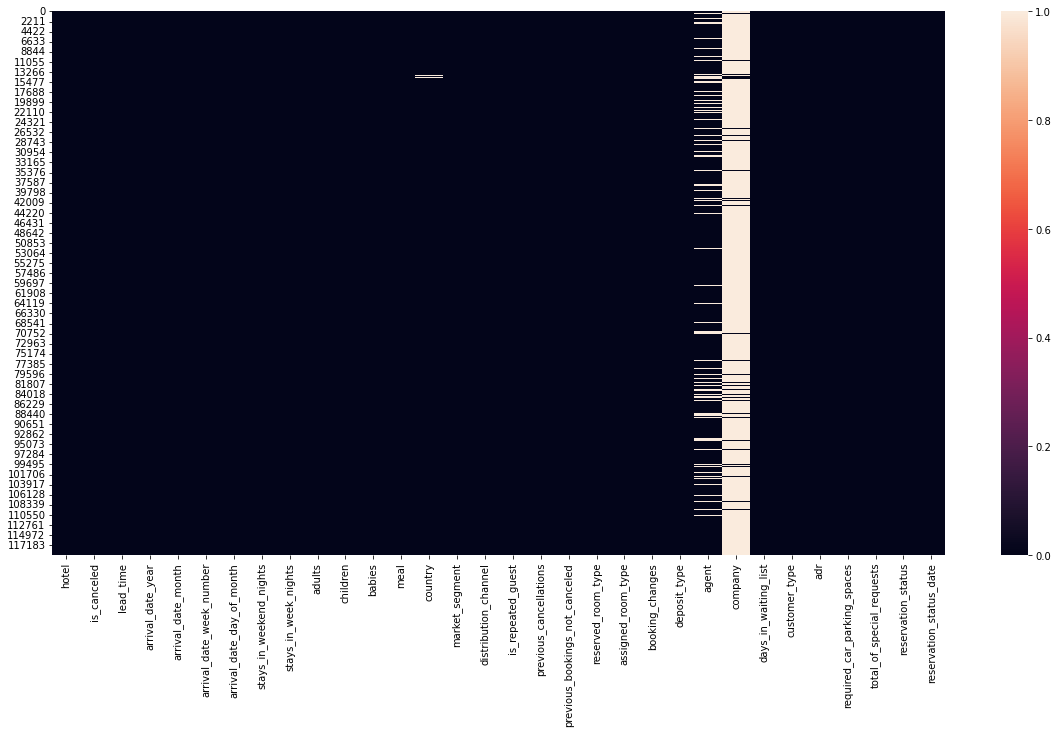

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull())
plt.show()

In [40]:
data[['country','agent','company']].isnull().sum()/len(data['company'])*100

country     0.408744
agent      13.686238
company    94.306893
dtype: float64

In [41]:
data = data.drop(['agent','company'],axis=1)

In [42]:
data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [43]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [44]:
data['country'].isnull().sum()

488

In [45]:
data = data.dropna(subset=['country'])
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [46]:
data.reset_index(inplace=True)

In [47]:
data

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,119385,City Hotel,0,23,2017,August,35,30,2,5,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
118898,119386,City Hotel,0,102,2017,August,35,31,2,5,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
118899,119387,City Hotel,0,34,2017,August,35,31,2,5,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
118900,119388,City Hotel,0,109,2017,August,35,31,2,5,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [48]:
data['agent'].isnull().sum()

KeyError: 'agent'

In [ ]:
# data['agent'] = data['agent'].fillna(data['agent'].mode()[0])

In [ ]:
duplicated = data.duplicated()
duplicated.sum()

0

In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   index                           118902 non-null  int64         
 1   hotel                           118902 non-null  object        
 2   is_canceled                     118902 non-null  int64         
 3   lead_time                       118902 non-null  int64         
 4   arrival_date_year               118902 non-null  int64         
 5   arrival_date_month              118902 non-null  object        
 6   arrival_date_week_number        118902 non-null  int64         
 7   arrival_date_day_of_month       118902 non-null  int64         
 8   stays_in_weekend_nights         118902 non-null  int64         
 9   stays_in_week_nights            118902 non-null  int64         
 10  adults                          118902 non-null  int64  

In [ ]:
data['reservation_status_date'].dt.year.value_counts()
data['reservation_status_date'].dt.month.value_counts()
data['reservation_status_date'].dt.day.value_counts()

2016    57529
2017    36395
2015    24797
2014      181
Name: reservation_status_date, dtype: int64


21    5432
6     4779
18    4461
2     4327
9     4259
1     4194
17    4179
25    4091
20    3963
15    3918
29    3853
12    3842
28    3803
19    3802
23    3778
22    3722
3     3717
24    3715
13    3701
4     3693
7     3692
11    3642
26    3630
16    3618
27    3585
8     3559
5     3540
10    3536
14    3492
30    3318
31    2061
Name: reservation_status_date, dtype: int64

In [ ]:
data['reservation_status_year'] = data['reservation_status_date'].dt.year
data['reservation_status_month'] = data['reservation_status_date'].dt.month
data['reservation_status_day']= data['reservation_status_date'].dt.day

In [ ]:
data.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,3


In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['reservation_status_week'] = data['reservation_status_date'].dt.week
data['reservation_status_weekday'] = data['reservation_status_date'].dt.weekday



/tmp/ipykernel_115535/2543318581.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['reservation_status_week'] = data['reservation_status_date'].dt.week


In [ ]:
data.drop('reservation_status_date',axis=1,inplace=True)
data

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_week,reservation_status_weekday
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,27,2
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,27,2
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,27,3
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,27,3
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,119385,City Hotel,0,23,2017,August,35,30,2,5,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,36,2
118898,119386,City Hotel,0,102,2017,August,35,31,2,5,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,36,3
118899,119387,City Hotel,0,34,2017,August,35,31,2,5,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,36,3
118900,119388,City Hotel,0,109,2017,August,35,31,2,5,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,36,3


In [ ]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [ ]:
data[cat_cols]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...
118897,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
118898,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
118899,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
118900,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [ ]:

[print(col, data[col].unique(),"\n", "-"*80) for col in cat_cols]


hotel ['Resort Hotel' 'City Hotel'] 
 --------------------------------------------------------------------------------
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 
 --------------------------------------------------------------------------------
meal ['BB' 'FB' 'HB' 'SC' 'Undefined'] 
 --------------------------------------------------------------------------------
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' '

[None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
# map month to numbers
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
data['arrival_date_month'] = data['arrival_date_month'].map(month_map)
data.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_week,reservation_status_weekday
0,0,Resort Hotel,0,342,2015,7,27,1,0,0,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,27,2
1,1,Resort Hotel,0,737,2015,7,27,1,0,0,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,27,2
2,2,Resort Hotel,0,7,2015,7,27,1,0,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,27,3
3,3,Resort Hotel,0,13,2015,7,27,1,0,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,27,3
4,4,Resort Hotel,0,14,2015,7,27,1,0,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,27,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['hotel'] = le.fit_transform(data['hotel'])
data['country'] = le.fit_transform(data['country'])

data

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_week,reservation_status_weekday
0,0,1,0,342,2015,7,27,1,0,0,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,27,2
1,1,1,0,737,2015,7,27,1,0,0,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,27,2
2,2,1,0,7,2015,7,27,1,0,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,27,3
3,3,1,0,13,2015,7,27,1,0,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,27,3
4,4,1,0,14,2015,7,27,1,0,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,119385,0,0,23,2017,8,35,30,2,5,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,36,2
118898,119386,0,0,102,2017,8,35,31,2,5,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,36,3
118899,119387,0,0,34,2017,8,35,31,2,5,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,36,3
118900,119388,0,0,109,2017,8,35,31,2,5,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,36,3
